In [1]:
import wntr
import wntr.network.controls as controls
import csv
import pandas as pd
import yaml
import matplotlib.pyplot as plt
import numpy as np

In [2]:
########## Simulation parameters ##########
file_path = "ctown_map_with_controls.inp"
wntr_simulation = False
simulation_days = 10

wntr_node_results_path =  "ctown_wntr_node_results.csv"
wntr_results_results_path = "ctown_wntr_results_results.csv"

epanet_node_results_path =  "ctown_epanet_node_results.csv"
epanet_results_results_path = "ctown_epanet_results_results.csv"

if wntr_simulation == True:
    output_node_path = wntr_node_results_path
    output_results_path = wntr_results_results_path
else:
    output_node_path = epanet_node_results_path
    output_results_path = epanet_results_results_path

In [3]:
######################################## init ####################################
inp_file = file_path
wn = wntr.network.WaterNetworkModel(inp_file)

### Demand and tank init levels parameters ######
week_index = 0
limit = (simulation_days * 24) - 1

demand_patterns_path = "../Demand_patterns/three_year_demands_ctown.csv"
starting_demand_path = "../Demand_patterns/starting_demand_points.csv"
initial_tank_levels_path = "../Demand_patterns/tank_initial_conditions.csv"

total_demands = pd.read_csv(demand_patterns_path, index_col=0)
demand_starting_points = pd.read_csv(starting_demand_path, index_col=0)
initial_tank_levels = pd.read_csv(initial_tank_levels_path, index_col=0)
week_start = demand_starting_points.iloc[week_index][0]
week_demands = total_demands.loc[week_start:week_start + limit, :]

for name, pat in wn.patterns():
    pat.multipliers = week_demands[name].values.tolist()

for i in range(1, 8):
    wn.get_node('T' + str(i)).init_level = \
    float(initial_tank_levels.iloc[week_index]['T' + str(i)])

C:\ProgramData\Anaconda3\lib\site-packages\wntr\epanet\io.py:2085: UserWarning:

Not all curves were used in "ctown_map_with_controls.inp"; added with type None, units conversion left to user



In [4]:
################################### Simulation ###################################

wn.options.time.duration = wn.options.time.hydraulic_timestep
iteration_limit = (simulation_days * 24 * 3600) / wn.options.time.hydraulic_timestep
master_time = 0

while master_time <= iteration_limit:
    if wntr_simulation == True:
        sim = wntr.sim.WNTRSimulator(wn, mode='PDD')
    else:
        sim = wntr.sim.EpanetSimulator(wn)

    if wntr_simulation == True:    
        results = sim.run_sim(convergence_error=True)
    else:
        results = sim.run_sim()
        
    wn.options.time.duration += wn.options.time.hydraulic_timestep
    master_time += 1

In [5]:
results.node['pressure']

name,J511,J411,J414,J415,J416,J417,J418,J419,J310,J311,...,J317,J323,R1,T1,T2,T3,T4,T5,T6,T7
0,29.648296,63.339233,37.906281,59.973106,82.373108,34.885235,28.072781,25.196070,48.027031,43.949875,...,54.416794,54.416794,-0.000001,5.622004,1.373781,2.109873,3.680609,1.466811,1.915250,4.015036
300,29.500790,63.291843,37.858891,59.825600,82.225601,34.837837,28.043447,25.166410,47.869987,43.792831,...,54.279648,54.279648,-0.000001,5.572965,1.343183,2.151768,3.533092,1.501423,1.884322,3.828917
600,29.353273,63.244453,37.811501,59.678082,82.078079,34.790451,28.014133,25.136774,47.713131,43.635979,...,54.142410,54.142410,-0.000001,5.523936,1.312603,2.193607,3.385576,1.535969,1.853078,3.643217
900,29.205767,63.197079,37.764130,59.530594,81.930595,34.743076,27.984842,25.107159,47.556530,43.479374,...,54.005245,54.005245,-0.000001,5.474911,1.282052,2.235391,3.238068,1.570442,1.821535,3.457935
1200,29.058250,63.149715,37.716763,59.383060,81.783058,34.695713,27.955574,25.077570,47.399841,43.322693,...,53.867580,53.867580,-0.000001,5.425900,1.251519,2.277128,3.090552,1.604839,1.789686,3.273063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
863100,30.772972,65.085487,39.653961,84.385399,98.668053,36.632965,30.071491,27.424667,53.044136,48.963966,...,66.996651,66.996651,-0.000001,2.393773,4.270227,3.697013,3.360498,2.650469,5.206826,2.486394
863400,30.763578,65.072647,39.641129,84.367889,98.654495,36.620132,30.028057,27.381010,53.043262,48.963093,...,66.998566,66.998566,-0.000001,2.379890,4.225914,3.664280,3.351168,2.678039,5.218760,2.485018
863700,30.754156,65.059830,39.628307,84.350372,98.640938,36.607311,29.984636,27.337362,53.042416,48.962246,...,67.000488,67.000488,-0.000001,2.366026,4.181610,3.631557,3.341801,2.705572,5.230648,2.483669
864000,30.748844,64.977348,39.544655,84.427864,98.736412,36.523609,29.944351,27.296053,52.950535,48.873379,...,66.757767,66.757767,-0.000001,2.352171,4.137320,3.598824,3.332407,2.733068,5.242498,2.482358


In [6]:
results.node['pressure'].to_csv("epanet_ctown_custom_demands.csv")

In [7]:
############################## read outputs ################################
epanet_ctown_pressure_results = pd.read_csv('epanet_ctown_custom_demands.csv')
wntr_ctown_resuls_results = pd.read_csv('no_custom_ctown_wntr_results_results.csv')

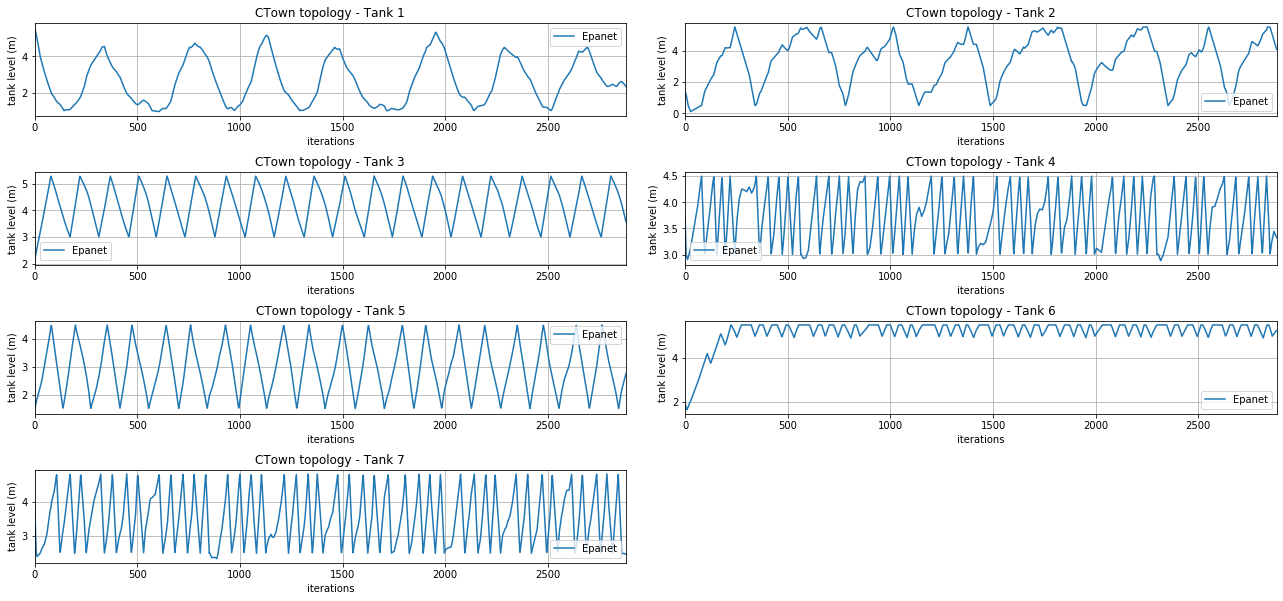

In [8]:
subplot_hspace = 0.6
subplot_wspace = 0.1

dd = plt.subplot(4,2,1)
epanet_ctown_pressure_results["T1"].plot(label='Epanet', ax=dd)
#wntr_ctown_resuls_results["T1_LEVEL"].plot(label='WNTR', ax=dd)
plt.title("CTown topology - Tank 1")
plt.xlabel('iterations')
plt.ylabel('tank level (m)')
plt.legend()
plt.subplots_adjust(top=2.00, right=3.00, hspace = subplot_hspace, wspace=subplot_wspace)
plt.grid(True)

dd = plt.subplot(4,2,2)
epanet_ctown_pressure_results["T2"].plot(label='Epanet', ax=dd)
#wntr_ctown_resuls_results["T2_LEVEL"].plot(label='WNTR', ax=dd)
plt.title("CTown topology - Tank 2")
plt.xlabel('iterations')
plt.ylabel('tank level (m)')
plt.legend()
plt.subplots_adjust(top=2.00, right=3.00, hspace = subplot_hspace, wspace=subplot_wspace)
plt.grid(True)

dd = plt.subplot(4,2,3)
epanet_ctown_pressure_results["T3"].plot(label='Epanet', ax=dd)
#wntr_ctown_resuls_results["T3_LEVEL"].plot(label='WNTR', ax=dd)
plt.title("CTown topology - Tank 3")
plt.xlabel('iterations')
plt.ylabel('tank level (m)')
plt.legend()
plt.subplots_adjust(top=2.00, right=3.00, hspace = subplot_hspace, wspace=subplot_wspace)
plt.grid(True)

dd = plt.subplot(4,2,4)
epanet_ctown_pressure_results["T4"].plot(label='Epanet', ax=dd)
#wntr_ctown_resuls_results["T4_LEVEL"].plot(label='WNTR', ax=dd)
plt.title("CTown topology - Tank 4")
plt.xlabel('iterations')
plt.ylabel('tank level (m)')
plt.legend()
plt.subplots_adjust(top=2.00, right=3.00, hspace = subplot_hspace, wspace=subplot_wspace)
plt.grid(True)

dd = plt.subplot(4,2,5)
epanet_ctown_pressure_results["T5"].plot(label='Epanet', ax=dd)
#wntr_ctown_resuls_results["T5_LEVEL"].plot(label='WNTR', ax=dd)
plt.title("CTown topology - Tank 5")
plt.xlabel('iterations')
plt.ylabel('tank level (m)')
plt.legend()
plt.subplots_adjust(top=2.00, right=3.00, hspace = subplot_hspace, wspace=subplot_wspace)
plt.grid(True)

dd = plt.subplot(4,2,6)
epanet_ctown_pressure_results["T6"].plot(label='Epanet', ax=dd)
#wntr_ctown_resuls_results["T6_LEVEL"].plot(label='WNTR', ax=dd)
plt.title("CTown topology - Tank 6")
plt.xlabel('iterations')
plt.ylabel('tank level (m)')
plt.legend()
plt.subplots_adjust(top=2.00, right=3.00, hspace = subplot_hspace, wspace=subplot_wspace)
plt.grid(True)


dd = plt.subplot(4,2,7)
epanet_ctown_pressure_results["T7"].plot(label='Epanet', ax=dd)
#wntr_ctown_resuls_results["T7_LEVEL"].plot(label='WNTR', ax=dd)
plt.title("CTown topology - Tank 7")
plt.xlabel('iterations')
plt.ylabel('tank level (m)')
plt.legend()
plt.subplots_adjust(top=2.00, right=3.00, hspace = subplot_hspace, wspace=subplot_wspace)
plt.grid(True)